In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [3]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn import preprocessing


In [37]:
dataset = read_csv("jas.csv")

### View the data

In [38]:
dataset.head(10)

,ApprovalFiscalYear,GrossApproval,NaicsCode,InitialInterestRate,BorrState,JobsSupported,LoanStatus
0,2012,1530000,111110.0,5.666667,IA,12,PIF
1,2013,1858400,111110.0,6.127500,VA,24,CANCLD
2,2014,620000,111110.0,5.625000,WA,21,PIF
3,2015,183000,111110.0,5.333333,AL,6,PIF
4,2016,5795500,111110.0,5.694444,ND,61,EXEMPT
5,2017,772300,111110.0,6.358333,MS,11,EXEMPT
6,2018,7744400,111110.0,5.838889,MO,28,EXEMPT
7,2019,6668800,111110.0,6.880000,PA,28,EXEMPT
8,2020,8962500,111110.0,7.185000,VA,68,EXEMPT
9,2013,970000,111120.0,6.000000,IL,23,EXEMPT


In [39]:
# Encode for the rows of strings ("BorrState" & "Loan Status")

le = preprocessing.LabelEncoder()

le.fit(dataset["BorrState"])
dataset["BorrState_Encoded"] = le.transform(dataset["BorrState"])

#le.fit(dataframe["LoanStatus"])
#dataframe["LoanStatus_Encoded"] = le.transform(dataframe["LoanStatus"])

#dataframe.drop(columns=['BorrState','LoanStatus','InitialInterestRate','JobsSupported'], inplace=True)
#dataframe

## Split into Training and test
Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [40]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

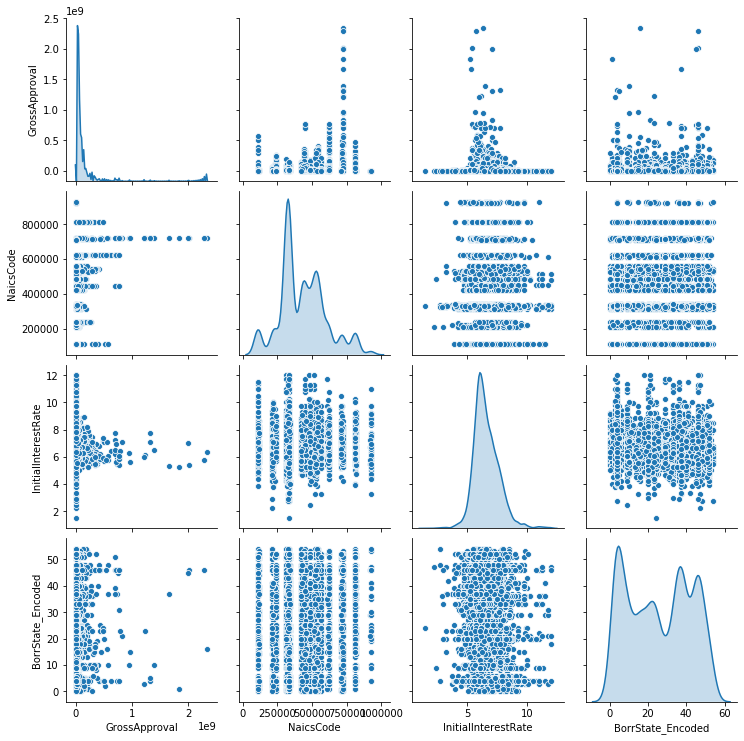

In [41]:
sns.pairplot(train_dataset[["GrossApproval", "NaicsCode", "InitialInterestRate", "BorrState_Encoded"]], diag_kind="kde")

In [42]:
train_stats = train_dataset.describe()
train_stats.pop("GrossApproval")
train_stats.pop("ApprovalFiscalYear")
train_stats.pop("NaicsCode")
train_stats.pop("BorrState_Encoded")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
InitialInterestRate,6704.0,6.608175,1.053627,1.5,5.933798,6.4375,7.21223,12.0
JobsSupported,6704.0,585.962112,2672.784184,0.0,27.000000,119.0000,405.25000,73995.0


In [43]:
#features = dataset.drop(columns="GrossApproval")
features = dataset[["ApprovalFiscalYear", "NaicsCode"]]
values = dataset["GrossApproval"]

In [44]:
#le.classes_
#le.inverse_transform(dataframe["LoanStatus_Encoded"])

In [45]:
X = features.values
y = values.values.reshape(-1, 1)

In [46]:
sc = StandardScaler()

x_scaler = sc.fit(X)
y_scaler = sc.fit(y)

X_scaled = x_scaler.transform(X)
y_scaled = x_scaler.transform(y)

In [47]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled)
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Inspect the data
Have a quick look at the joint distribution of a few pairs of columns from the training set.

In [48]:
# define the model
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='softmax'))

In [49]:
# define the model
scaled_model = Sequential()
scaled_model.add(Dense(units=6, activation='relu', input_dim=2))
scaled_model.add(Dense(units=1, activation='softmax'))

In [50]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

In [51]:
# Compile model
scaled_model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
model.fit(
    X_train,
    y_train,
    epochs=50,
    shuffle=True,
    verbose=1
)

Epoch 1/50
197/197 [==============================] - 0s 499us/step - loss: 7147555188113408.0000
Epoch 2/50
197/197 [==============================] - 0s 506us/step - loss: 7147554651242496.0000
Epoch 3/50
197/197 [==============================] - 0s 486us/step - loss: 7147552503758848.0000
Epoch 4/50
197/197 [==============================] - 0s 496us/step - loss: 7147555188113408.0000
Epoch 5/50
197/197 [==============================] - 0s 509us/step - loss: 7147555188113408.0000
Epoch 6/50
197/197 [==============================] - 0s 491us/step - loss: 7147554114371584.0000
Epoch 7/50
197/197 [==============================] - 0s 506us/step - loss: 7147555188113408.0000
Epoch 8/50
197/197 [==============================] - 0s 521us/step - loss: 7147556261855232.0000
Epoch 9/50
197/197 [==============================] - 0s 491us/step - loss: 7147554114371584.0000
Epoch 10/50
197/197 [==============================] - 0s 542us/step - loss: 7147554114371584.0000
Epoch 11/50
197/197

In [61]:
scaled_model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=50, # change this to something bigger
    shuffle=True,
    verbose=1
)

Epoch 1/50
197/197 [==============================] - 0s 496us/step - loss: nan
Epoch 2/50
197/197 [==============================] - 0s 516us/step - loss: nan
Epoch 3/50
197/197 [==============================] - 0s 501us/step - loss: nan
Epoch 4/50
197/197 [==============================] - 0s 532us/step - loss: nan
Epoch 5/50
197/197 [==============================] - 0s 491us/step - loss: nan
Epoch 6/50
197/197 [==============================] - 0s 491us/step - loss: nan
Epoch 7/50
197/197 [==============================] - 0s 496us/step - loss: nan
Epoch 8/50
197/197 [==============================] - 0s 481us/step - loss: nan
Epoch 9/50
197/197 [==============================] - 0s 511us/step - loss: nan
Epoch 10/50
197/197 [==============================] - 0s 537us/step - loss: nan
Epoch 11/50
197/197 [==============================] - 0s 506us/step - loss: nan
Epoch 12/50
197/197 [==============================] - 0s 491us/step - loss: nan
Epoch 13/50
197/197 [================

In [62]:
predictions = scaled_model.predict(X_test_scaled)

In [63]:
y_scaler.inverse_transform(predictions)

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)